In [2]:
import pandas as pd
import os

input_dir = '../../outputs/nested/HAN/baseline/200_dim100_ignore_pad_dropout_0.2/ploted_attention/'

TP = pd.read_csv(os.path.join(input_dir, 'TP_vital_word_freq.csv'))
TN = pd.read_csv(os.path.join(input_dir, 'TN_vital_word_freq.csv'))
FP = pd.read_csv(os.path.join(input_dir, 'FP_vital_word_freq.csv'))
FN = pd.read_csv(os.path.join(input_dir, 'FN_vital_word_freq.csv'))

## Threshold according to the length of a sentence / a word

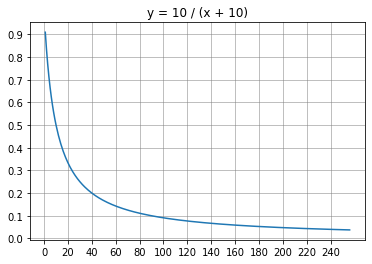

In [3]:
import matplotlib.pyplot as plt
import numpy as np
a = 10
b = 10

x = np.linspace( 1, 256, 256)
y = a / (x + b)
plt.plot(x, y)
plt.title(f'y = {a} / (x + {b})')
plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.5)
plt.xticks(np.arange(0,256,20))
plt.yticks(np.arange(0,1,0.1))
plt.show()

Text(0.5, 1.0, 'FN')

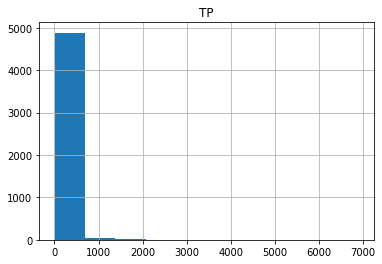

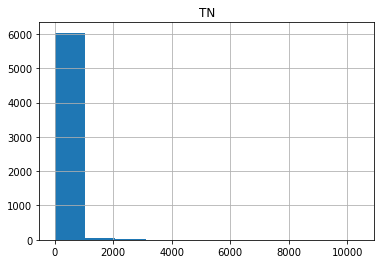

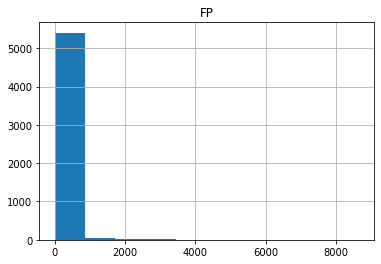

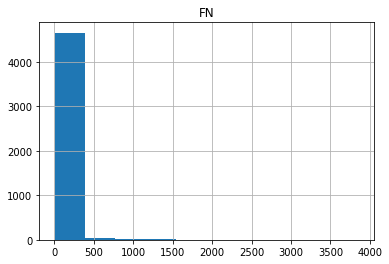

In [6]:
TP.hist(column='freq')[0][0].set_title('TP')
TN.hist(column='freq')[0][0].set_title('TN')
FP.hist(column='freq')[0][0].set_title('FP')
FN.hist(column='freq')[0][0].set_title('FN')

Text(0.5, 1.0, 'FN')

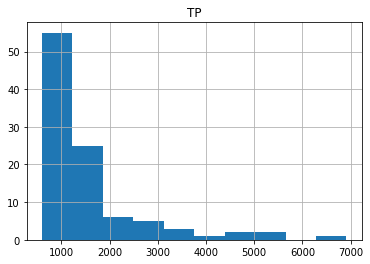

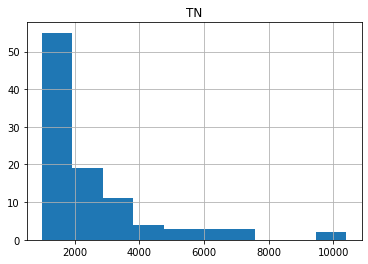

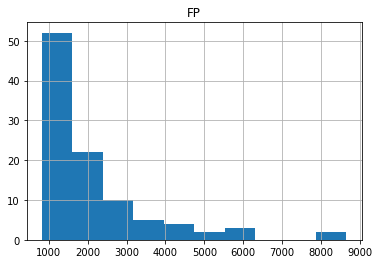

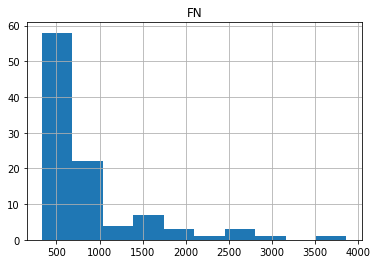

In [5]:
TP[:100].hist(column='freq')[0][0].set_title('TP')
TN[:100].hist(column='freq')[0][0].set_title('TN')
FP[:100].hist(column='freq')[0][0].set_title('FP')
FN[:100].hist(column='freq')[0][0].set_title('FN')

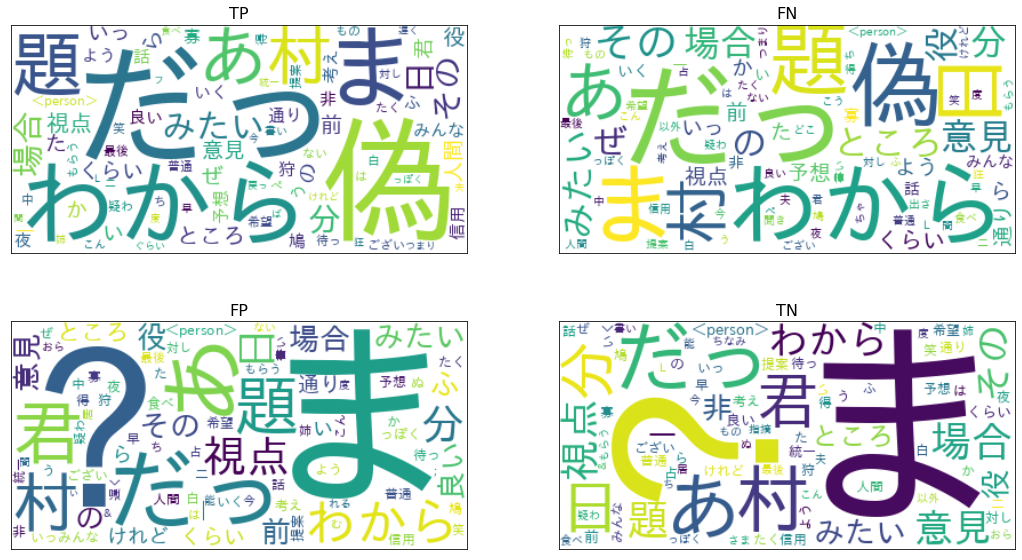

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
font_path = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'

def create_wordcloud(df):
    d = {}
    for _, a, x in df[15:100].values:
        d[a] = x
    wordcloud = WordCloud(font_path=font_path, background_color='white')
    wordcloud.generate_from_frequencies(frequencies=d)
    return wordcloud


row=2
col=2
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(18,10))

pred_class = ['TP', 'FN', 'FP', 'TN']
wordcloud = [create_wordcloud(pred_class_df) for pred_class_df in [TP, FN, FP, TN]]

for i, img in enumerate(wordcloud):
    _r= i//col
    _c= i%col
    ax[_r,_c].set_title(pred_class[i], fontsize=16, color='black')
    ax[_r,_c].axes.xaxis.set_visible(False) # X軸を非表示に
    ax[_r,_c].axes.yaxis.set_visible(False) # Y軸を非表示に
    ax[_r,_c].imshow(img, interpolation="bilinear") # 画像を表示

In [8]:
set_TP = set(TP[:200]['token'])
set_TN = set(TN[:200]['token'])
set_FP = set(FP[:200]['token'])
set_FN = set(FN[:200]['token'])

u_TP = ((set_TP - set_TN) - set_FP) - set_FN
u_TN = ((set_TN - set_TP) - set_FP) - set_FN
u_FP = ((set_FP - set_TN) - set_TP) - set_FN
u_FN = ((set_FN - set_TN) - set_FP) - set_TP

u_positive = (u_TP - set_TN) - set_FN

print(len(u_TP))
print(len(u_TN))
print(len(u_FP))
print(len(u_FN))

print(len(u_positive))

display(TP[TP['token'].isin(list(u_positive))].sort_values(by='freq', ascending=False))

2
5
6
4
2


,Unnamed: 0,token,freq
169,169,ダメ,385
197,197,片,329


In [9]:
TP[TP['token'].isin(list(u_positive))].sort_values(by='freq', ascending=False)

,Unnamed: 0,token,freq
169,169,ダメ,385
197,197,片,329
